# **Tutoriel 1: Apprentissage surpervisé: Classification sur le Dataset MNIST** 
#*Tutorial 1:Supervised learning: Classification on the MNIST dataset*

## **Nous allons effectuer une classification sur le dataset MNIST** 
## (*We will perform a classification on the MNIST dataset *)
 ### **Nous allons contruire trois  modeles**
 ### (*We will build three models* )
#### **- Un modele avec une architecture de reseau de neuronnes dense (DNN)**
#### - (*A model with a dense neural network architecture(DNN)*)
#### **- Un model avec une architecture de reseau convolutionnel (CNN)**
#### -(*A model with a Convolutional Network Architecture (CNN))*
#### **- A very particular model (Letnet) which is also a particular model of convolutional network **
#### -(*A model on the Convolutional Network Architecture (Letnet)*


#I- **PREPARATION DE L'ENVIRONEMMENT DE TRAVAIL**
#(*PREPARATION OF THE WORKING ENVIRONMENT*)

##I.1.**importation des bibiotheques necessaires**
## (*import of the necessary libraries*) 

In [ ]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import os
import itertools
import datetime
from sklearn.metrics import confusion_matrix
from skimage import  transform
from tensorflow import keras 
from importlib import reload
from IPython.display import display

fit_verbosity = 2

##I.2. .**Définition d'une fonction pour l'affichage des résultats** [ce n'est pas obligatoire]
###(*definition of a function for the display of results*)[ this is not obligatory ]

In [ ]:

def plot_images(x,y=None, indices='all', columns=12, x_size=1, y_size=1,
                colorbar=False, y_pred=None, cm='binary', y_padding=0.35, spines_alpha=1,
                fontsize=20, interpolation='lanczos'):
    if indices=='all': indices=range(len(x))
    draw_labels = (y is not None)
    draw_pred   = (y_pred is not None)
    rows        = math.ceil(len(indices)/columns)
    fig=plt.figure(figsize=(columns*x_size, rows*(y_size+y_padding)))
    n=1
    for i in indices:
        axs=fig.add_subplot(rows, columns, n)
        n+=1
        # ---- Shape is (lx,ly)
        if len(x[i].shape)==2:
            xx=x[i]
        # ---- Shape is (lx,ly,n)
        if len(x[i].shape)==3:
            (lx,ly,lz)=x[i].shape
            if lz==1: 
                xx=x[i].reshape(lx,ly)
            else:
                xx=x[i]
        img=axs.imshow(xx,   cmap = cm, interpolation=interpolation)
#         img=axs.imshow(xx,   cmap = cm, interpolation=interpolation)
        axs.spines['right'].set_visible(True)
        axs.spines['left'].set_visible(True)
        axs.spines['top'].set_visible(True)
        axs.spines['bottom'].set_visible(True)
        axs.spines['right'].set_alpha(spines_alpha)
        axs.spines['left'].set_alpha(spines_alpha)
        axs.spines['top'].set_alpha(spines_alpha)
        axs.spines['bottom'].set_alpha(spines_alpha)
        axs.set_yticks([])
        axs.set_xticks([])
        if draw_labels and not draw_pred:
            axs.set_xlabel(y[i],fontsize=fontsize)
        if draw_labels and draw_pred:
            if y[i]!=y_pred[i]:
                axs.set_xlabel(f'{y_pred[i]} ({y[i]})',fontsize=fontsize)
                axs.xaxis.label.set_color('red')
            else:
                axs.set_xlabel(y[i],fontsize=fontsize)
        if colorbar:
            fig.colorbar(img,orientation="vertical", shrink=0.65)
    #save_fig(save_as)
    plt.show()


##I.3. **Définition d'une fonction pour la matrice de confusion** [ce n'est pas obligatoire]
###(*definition of a function for the display of results*)[ this is not obligatory ]

In [ ]:
def plot_confusion_matrix(y_true,y_pred,
                          target_names,
                          title='Matrice_de_confusion ** Confusion_matrix',
                          cmap=None,
                          normalize=True,
                          figsize=(10, 8),
                          digit_format='{:0.2f}'):
    cm = confusion_matrix( y_true,y_pred, normalize=None, labels=target_names)
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, digit_format.format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
display('AUTEUR ** TCHOTANEU NGATCHA GIRESSE')
display('tutorial 1  : Supersed_LEARNING  ** tutouriel 1 : Apprentissage_superfisée')
global start_time
start_time = datetime.datetime.now()
print('Run time :', start_time.strftime("%A %d %B %Y, %H:%M:%S"))

'AUTEUR ** TCHOTANEU NGATCHA GIRESSE'

'Practical Work MACHINE LEARNING  ** TRAVAUX PRATIQUE APPRENTISSAGE AUTOMATIQUE'

Run time : Sunday 21 August 2022, 04:41:53


#II-**PREMIERE PARTIE : Architecture à Reseaux de Neuronnes Denses**
#II-*PART 1: Dense Neural Network Architecture*

##II.1- **PREPARATION DES DONNEES**
## (*PREPARATION OF DATA*)




###II.1.1- **RECUPERATION ET CHARGEMENT DU DATASET**
###(*RETRIEVING AND LOADING THE DATASET*)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


####II.1.2-  **NORMALISATION DES DONNEES**
####*(Data Normalisation)*

In [ ]:
# pour la prepartion des données nous allons normaliser nous données (Fr)
# for data preparation we will normalize our data (En)
print('lang={} -Avant la normalisation : Min={}, Max={}'.format('fr',x_train.min(),x_train.max()))
print('lang={} -Before normalization : Min={}, Max={}'.format('En',x_train.min(),x_train.max()))


xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax
print(xmax)
print('lang={} -After normalization  : Min={}, Max={}'.format('fr',x_train.min(),x_train.max()))
print('lang={} -Apres la normalisation  : Min={}, Max={}'.format('En',x_train.min(),x_train.max()))

lang=fr -Avant la normalisation : Min=0, Max=255
lang=En -Before normalization : Min=0, Max=255
255
lang=fr -After normalization  : Min=0.0, Max=1.0
lang=En -Apres la normalisation  : Min=0.0, Max=1.0


###II.1.3 **VISUALISATION DE CERTAINS ELEMENTS DE NOTRE JEU DE DONNEES**##
 ### ( *Visualisation of some elements of our dataset* ) ##


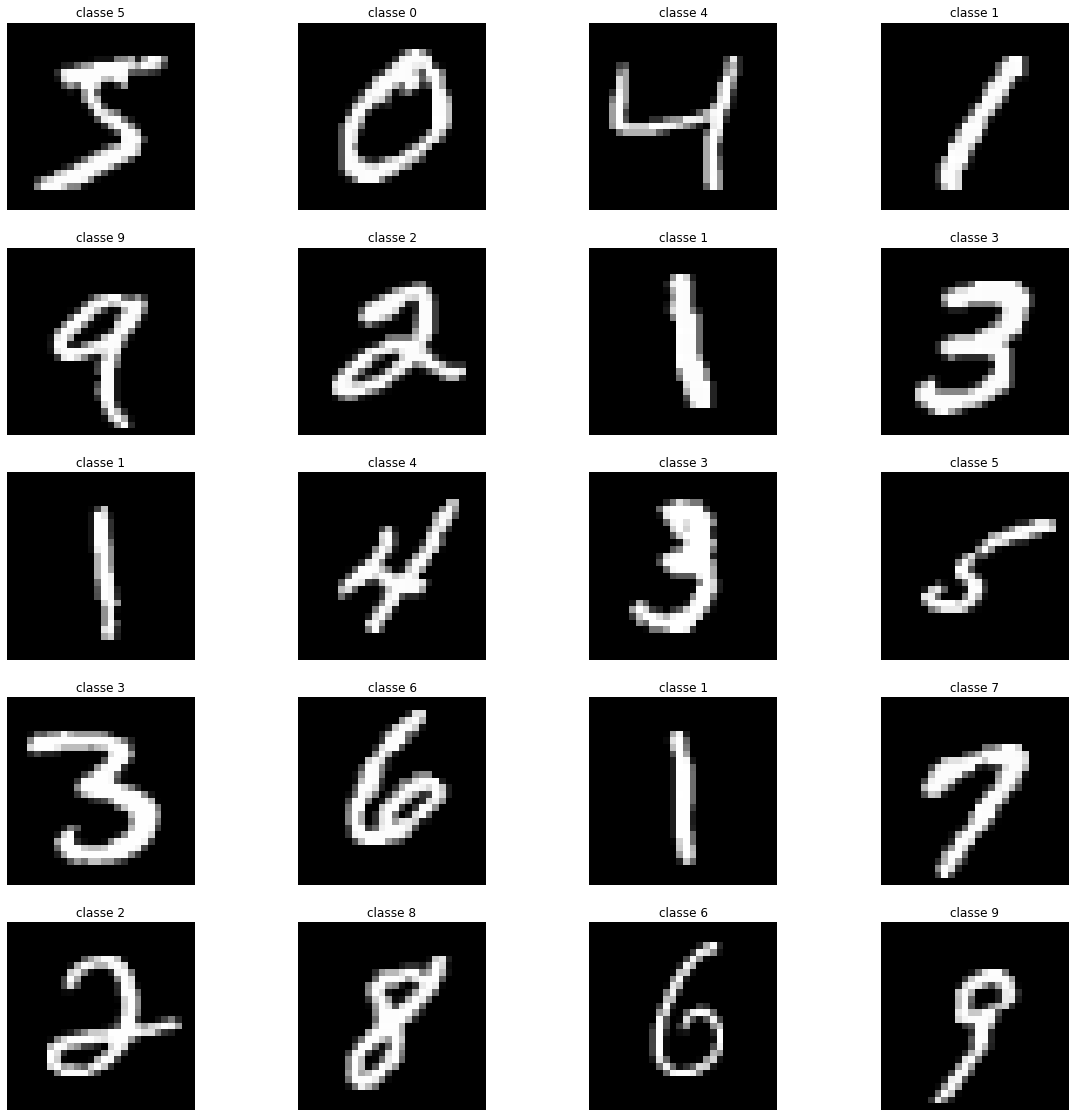

In [ ]:
listeImage=x_train
classeImage=y_train

plt.figure(figsize=(20, 20))
for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(listeImage[i,:].reshape([28,28]), cmap='gray')
    plt.title('classe {}'.format(classeImage[i]))
    plt.axis('off')
plt.show()


##II.2- **CREATION DU MODELE**
## (*CREATION OF THE MODEL*)



In [ ]:
nombreNeuroneCouche_Cache_1=100
nombreNeuroneCouche2_Cache_2=100 # Nous voulons une 100 neuronnes au niveau de la couches c
nombre_sortie=10               #Nous voulons effectuer une classification pour dix classes // We want to perform a classification for ten classes 


In [ ]:

model_DNN = keras.Sequential([
    keras.layers.Input((28,28)),                                       # la couche d'entre 
    keras.layers.Flatten(),                                              # nous allons applatir l'image en entree pour pouvoir l'envoye a nos neronne de la couche  caché 1
    keras.layers.Dense( nombreNeuroneCouche_Cache_1, activation='relu'),  # definition de la premiere couche caché 
    keras.layers.Dense( nombreNeuroneCouche2_Cache_2, activation='relu'),  # definition de la deuxieme couche caché 
    keras.layers.Dense( nombre_sortie,      activation='softmax')             # definition de la couche de sortie 
])

model_DNN.compile(optimizer='adam',                        # fonction d'optimisztion Optimiseur qui implémente l'algorithme Adam.
              loss='sparse_categorical_crossentropy',   # fonction de perte "class SparseCategoricalCrossentropy:"" calcule la perte d'entropie croisée entre les étiquettes reels  et les prédictions.
              metrics=['accuracy'])                     # les metrique calcule la fréquence à laquelle les prédictions correspondent aux libellés car nous donnee sont labelisé sur 10 classes 
model_DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


##II.3-**ENTRAINEMENT DU MODELE**
##*Model training*

In [ ]:
batch_size  = 1000
epochs      =  20
fit_verbosity =2

history_DNN = model_DNN.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x_test, y_test))

Epoch 1/20
60/60 - 3s - loss: 0.8117 - accuracy: 0.7926 - val_loss: 0.3016 - val_accuracy: 0.9175 - 3s/epoch - 53ms/step
Epoch 2/20
60/60 - 0s - loss: 0.2665 - accuracy: 0.9242 - val_loss: 0.2242 - val_accuracy: 0.9353 - 263ms/epoch - 4ms/step
Epoch 3/20
60/60 - 0s - loss: 0.2082 - accuracy: 0.9411 - val_loss: 0.1864 - val_accuracy: 0.9481 - 262ms/epoch - 4ms/step
Epoch 4/20
60/60 - 0s - loss: 0.1762 - accuracy: 0.9490 - val_loss: 0.1623 - val_accuracy: 0.9520 - 264ms/epoch - 4ms/step
Epoch 5/20
60/60 - 0s - loss: 0.1479 - accuracy: 0.9577 - val_loss: 0.1456 - val_accuracy: 0.9562 - 223ms/epoch - 4ms/step
Epoch 6/20
60/60 - 0s - loss: 0.1288 - accuracy: 0.9632 - val_loss: 0.1270 - val_accuracy: 0.9632 - 226ms/epoch - 4ms/step
Epoch 7/20
60/60 - 0s - loss: 0.1138 - accuracy: 0.9670 - val_loss: 0.1241 - val_accuracy: 0.9637 - 221ms/epoch - 4ms/step
Epoch 8/20
60/60 - 0s - loss: 0.1013 - accuracy: 0.9704 - val_loss: 0.1093 - val_accuracy: 0.9676 - 225ms/epoch - 4ms/step
Epoch 9/20
60/60 -

#II.4- **ÉVALUATION DU MODELE**
#(*Evaluation of the model*)

In [ ]:
score_DNN = model_DNN.evaluate(x_test, y_test, verbose=2)

print('Test loss     :', score_DNN[0])
print('Test accuracy :', score_DNN[1])

313/313 - 1s - loss: 0.0771 - accuracy: 0.9764 - 936ms/epoch - 3ms/step
Test loss     : 0.07713916152715683
Test accuracy : 0.9764000177383423


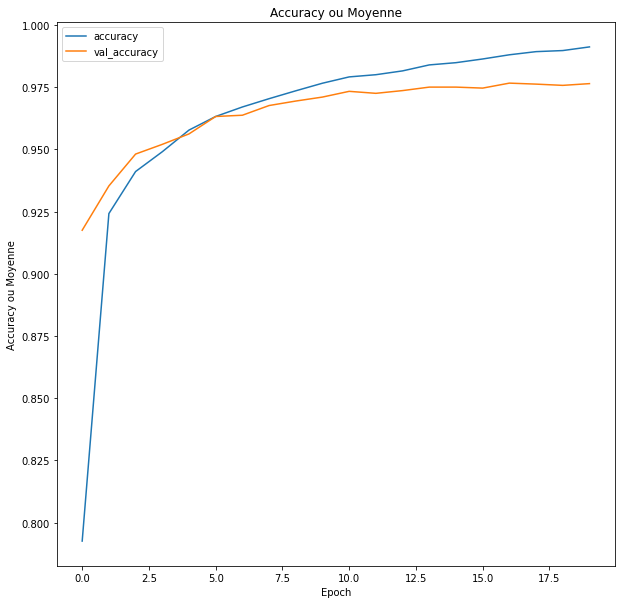

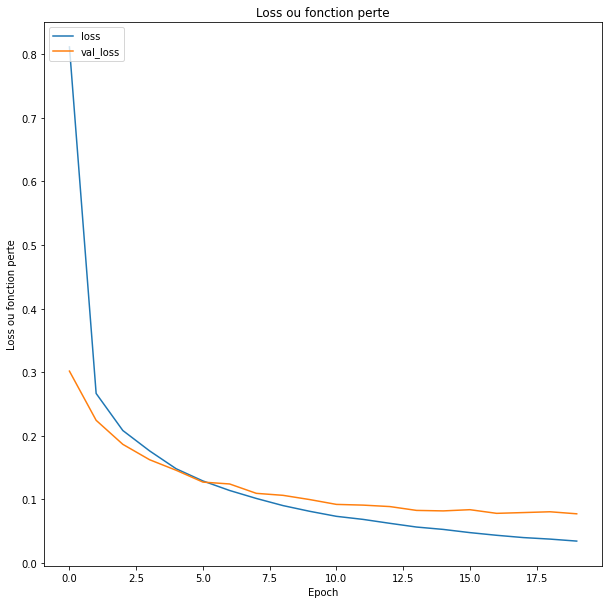

In [ ]:
plot={"Accuracy ou Moyenne":['accuracy','val_accuracy'], 'Loss ou fonction perte':['loss', 'val_loss']}
for title,curves in plot.items():
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.ylabel(title)
    plt.xlabel('Epoch')
    for c in curves:
        plt.plot(history_DNN.history[c])
        plt.legend(curves, loc='upper left')
    plt.show()

##II.5- **OBSERVATION ET INTERPRETATION DES RESULTATS**
##(*OBSERVATION AND INTERPRETATION OF RESULTS*)

###II.5-1.**Observation de certains résultats du test** 
###(*Observation of some Test Results*)

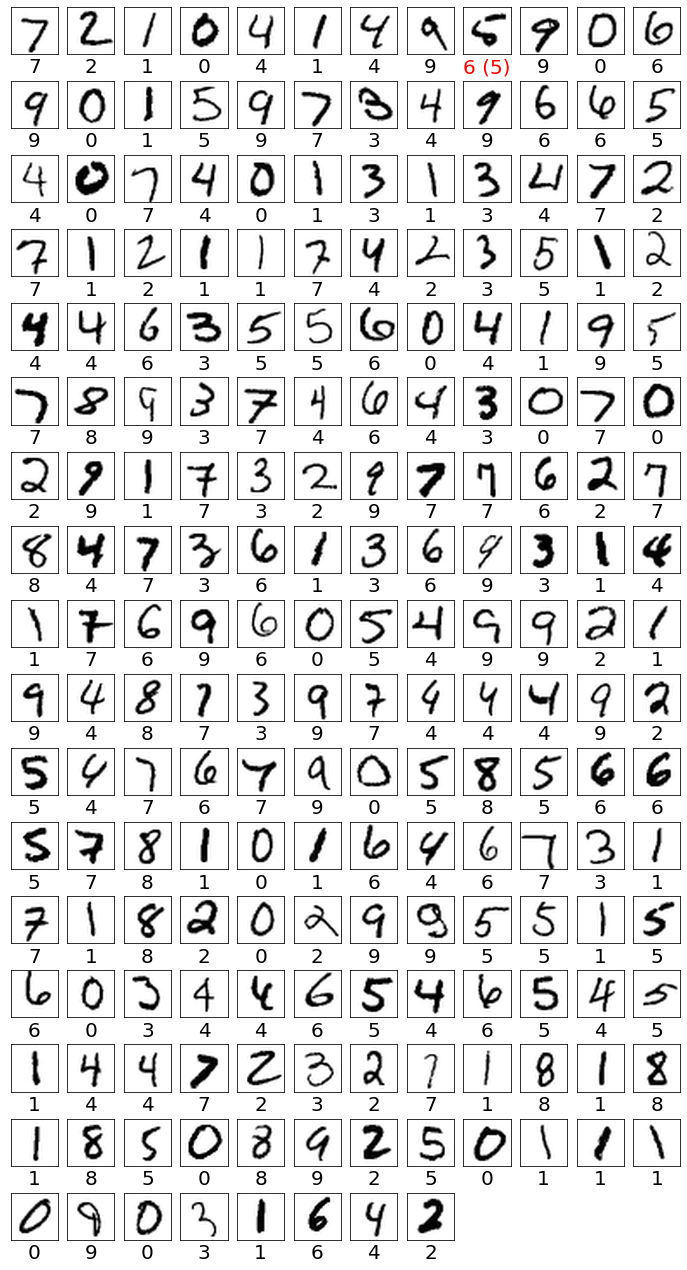

In [ ]:
y_sigmoid = model_DNN.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)
plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred)

###II.5.2 - .**Observation des resultats où le modèle a échoué** 
###(*Observation of tests where the model failed*)

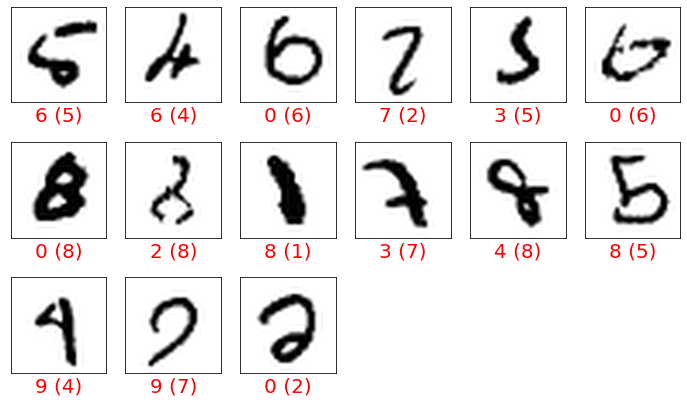

In [ ]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred)

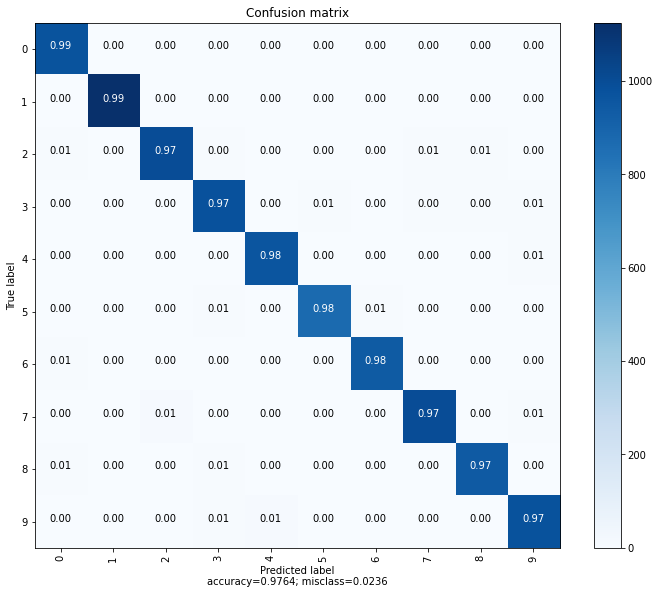

In [ ]:
plot_confusion_matrix(y_test,y_pred,range(10),normalize=True)

#III- **PARTIE 2 : CONSTRUITION AVEC UNE ARCHITECTURE DE RESEAUX CONVOLUTIONNEL**
#(*BUILDING WITH A CONVOLUTIONAL NETWORK ARCHITECTURE*)
##III.1- **PREPARATION DES DONNEES**
### (*PREPARATION OF DATA*)
###III.1.1- **RECUPERATION ET CHARGEMENT DU DATASET**
###(*RETRIEVING AND LOADING THE DATASET*)

In [ ]:
(x2_train, y2_train), (x2_test, y2_test) = keras.datasets.mnist.load_data()

x2_train = x2_train.reshape(-1,28,28,1)
x2_test = x2_test.reshape(-1,28,28,1)

print("x_train : ",x2_train.shape)
print("y_train : ",y2_train.shape)
print("x_test  : ",x2_test.shape)
print("y_test  : ",y2_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


####III.1.2-  **NORMALISATION DES DONNEES**
####*(Data Normalisation)*

In [ ]:
print('Before normalization : Min={}, max={}'.format(x2_train.min(),x2_train.max()))

xmax=x2_train.max()
x2_train = x2_train / xmax
x2_test = x2_test  / xmax

print('After normalization  : Min={}, max={}'.format(x2_train.min(),x2_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


###III.1.3 **VISUALISATION DE CERTAINS ELEMENTS DE NOTRE JEU DE DONNEES**##
 ### ( *Visualisation of some elements of our dataset* ) ##


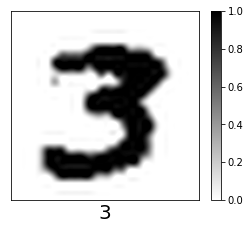

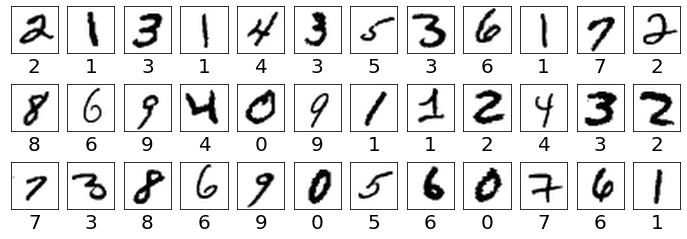

In [ ]:
plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True)
plot_images(x_train, y_train, range(5,41), columns=12)

##III.2- **CREATION DU MODELE**
## (*CREATION OF THE MODEL*)

In [ ]:
model_CNN = keras.models.Sequential()

model_CNN.add( keras.layers.Input((28,28,1)) )

model_CNN.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
model_CNN.add( keras.layers.MaxPooling2D((2,2)))
model_CNN.add( keras.layers.Dropout(0.2)) # elle permet de deconnecter certain neuronnes  dans le but d'equibre l'apprendissage . elle se fait de maniere aleatoire a chaque phase d'apprentissage  (it allows to disconnect certain neurons in order to balance the learning. it is done randomly at each learning phase)

model_CNN.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model_CNN.add( keras.layers.MaxPooling2D((2,2)))
model_CNN.add( keras.layers.Dropout(0.2))

model_CNN.add( keras.layers.Flatten()) 
model_CNN.add( keras.layers.Dense(100, activation='relu'))
model_CNN.add( keras.layers.Dropout(0.5))

model_CNN.add( keras.layers.Dense(10, activation='softmax'))

In [ ]:
model_CNN.summary()

model_CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 16)         

##III.3-**ENTRAINEMENT DU MODELE**
##*Model training*

In [ ]:
batch_size  = 1000
epochs      =  20

history_CNN = model_CNN.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x_test, y_test))

Epoch 1/20
60/60 - 10s - loss: 1.4228 - accuracy: 0.5288 - val_loss: 0.4441 - val_accuracy: 0.8877 - 10s/epoch - 161ms/step
Epoch 2/20
60/60 - 1s - loss: 0.5378 - accuracy: 0.8306 - val_loss: 0.2278 - val_accuracy: 0.9381 - 508ms/epoch - 8ms/step
Epoch 3/20
60/60 - 1s - loss: 0.3667 - accuracy: 0.8857 - val_loss: 0.1553 - val_accuracy: 0.9535 - 506ms/epoch - 8ms/step
Epoch 4/20
60/60 - 1s - loss: 0.2854 - accuracy: 0.9122 - val_loss: 0.1230 - val_accuracy: 0.9612 - 505ms/epoch - 8ms/step
Epoch 5/20
60/60 - 0s - loss: 0.2456 - accuracy: 0.9252 - val_loss: 0.1015 - val_accuracy: 0.9692 - 486ms/epoch - 8ms/step
Epoch 6/20
60/60 - 0s - loss: 0.2173 - accuracy: 0.9344 - val_loss: 0.0887 - val_accuracy: 0.9726 - 492ms/epoch - 8ms/step
Epoch 7/20
60/60 - 1s - loss: 0.1913 - accuracy: 0.9425 - val_loss: 0.0788 - val_accuracy: 0.9753 - 508ms/epoch - 8ms/step
Epoch 8/20
60/60 - 1s - loss: 0.1772 - accuracy: 0.9463 - val_loss: 0.0714 - val_accuracy: 0.9777 - 512ms/epoch - 9ms/step
Epoch 9/20
60/6

#III.4- **ÉVALUATION DU MODELE**
#(*Evaluation of the model*)

In [ ]:
score_CNN = model_CNN.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score_CNN[0]:4.4f}')
print(f'Test accuracy : {score_CNN[1]:4.4f}')

Test loss     : 0.0413
Test accuracy : 0.9862


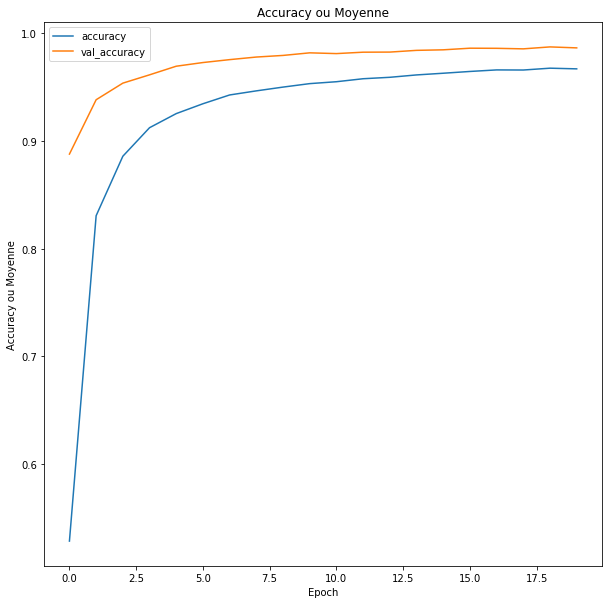

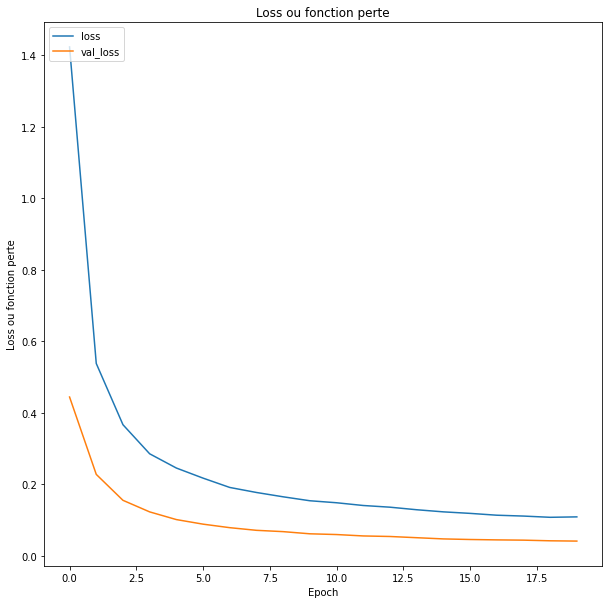

In [ ]:
plot={"Accuracy ou Moyenne":['accuracy','val_accuracy'], 'Loss ou fonction perte':['loss', 'val_loss']}
for title,curves in plot.items():
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.ylabel(title)
    plt.xlabel('Epoch')
    for c in curves:
        plt.plot(history_CNN.history[c])
        plt.legend(curves, loc='upper left')
    plt.show()

##III.5- **OBSERVATION ET INTERPRETATION DES RESULTATS**
##(*OBSERVATION AND INTERPRETATION OF RESULTS*)

###III.5-1.**Observation de certains résultats du test** 
###(*Observation of some Test Results*)

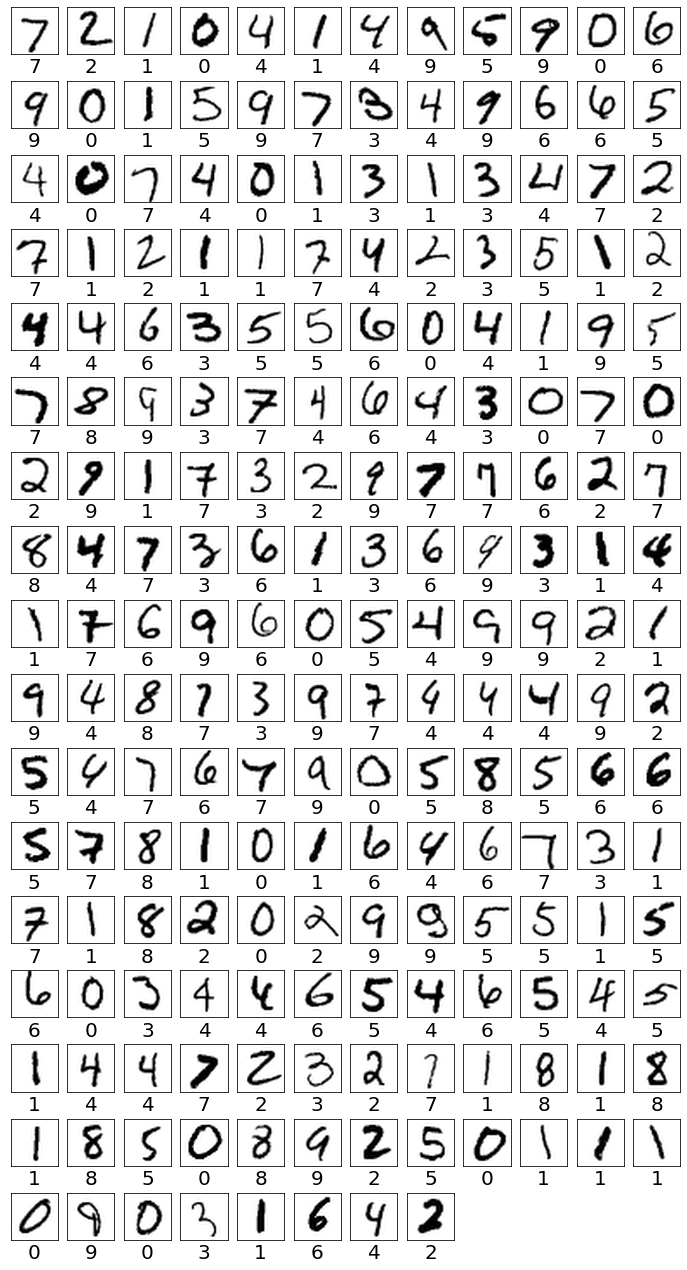

In [ ]:
y_sigmoid = model_CNN.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)
plot_images(x2_test, y2_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred)

###II.5.2 - .**Observation des resultats où le modèle a échoué** 
###(*Observation of tests where the model failed*)

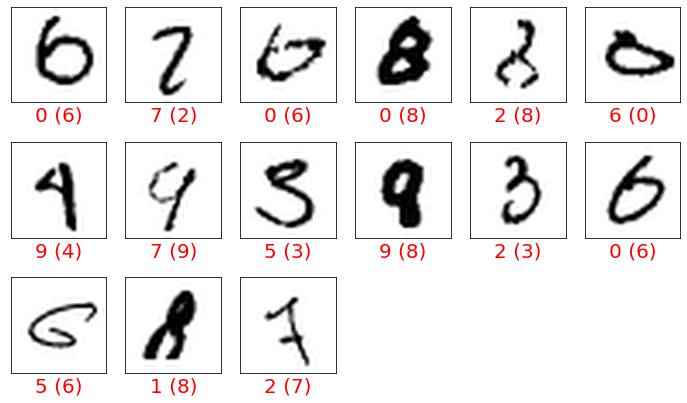

In [ ]:
errors=[ i for i in range(len(x2_test)) if y_pred[i]!=y2_test[i] ]
errors=errors[:min(24,len(errors))]
plot_images(x2_test, y2_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred)

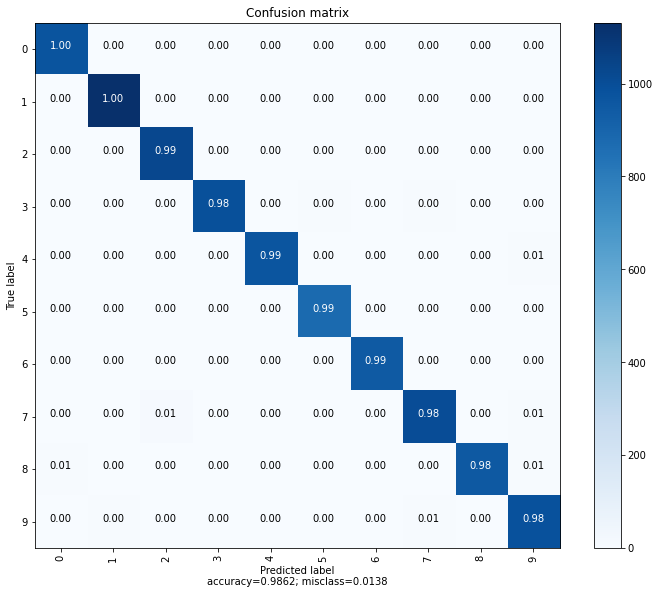

In [ ]:
plot_confusion_matrix(y2_test,y_pred,range(10),normalize=True)

#VI- **PARTIE 3 : CONSTRUITION DU MODEL  CONVOLUTIONNEL**[**Letnet**]
#(*BUILDING THE CONVOLUTIONAL MODEL*) [*Letnet*]
##VI.1-  Conctrution du modele Letnet

In [ ]:
model_Letnet = keras.models.Sequential()

model_Letnet.add( keras.layers.Input((32,32,1)) )

model_Letnet.add( keras.layers.Conv2D(6, (5,5),  activation='relu') )
model_Letnet.add( keras.layers.MaxPooling2D((2,2)))

model_Letnet.add( keras.layers.Conv2D(16, (5,5), activation='relu') )
model_Letnet.add( keras.layers.MaxPooling2D((2,2)))

model_Letnet.add( keras.layers.Flatten()) 
model_Letnet.add( keras.layers.Dense(120, activation='relu'))
model_Letnet.add( keras.layers.Dense(84, activation='relu'))


model_Letnet.add( keras.layers.Dense(10, activation='softmax'))

In [ ]:
model_Letnet.summary()

model_Letnet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_5 (Dense)             (None, 120)              

##VI.2- **PREPARATION DES DONNEES**
## (*PREPARATION OF DATA*)
###VI.2.1- **RECUPERATION ET CHARGEMENT DU DATASET**
###(*RETRIEVING AND LOADING THE DATASET*)

In [ ]:
(x3_train, y3_train), (x3_test, y3_test) = keras.datasets.mnist.load_data()
print("x3_train : ",x3_train.shape)
print("y3_train : ",y3_train.shape)
print("x3_test  : ",x3_test.shape)
print("y3_test  : ",y3_test.shape)

print('Before normalization : Min={}, max={}'.format(x3_train.min(),x3_train.max()))
#xmax=x3_train.max()
#x3_train = x3_train / xmax
#x3_test = x3_test  / xmax

#print('After normalization  : Min={}, max={}'.format(x3_train.min(),x3_train.max()))


x3_train :  (60000, 28, 28)
y3_train :  (60000,)
x3_test  :  (10000, 28, 28)
y3_test  :  (10000,)
Before normalization : Min=0, max=255


###VI.2.-**Fonction pour redefinir la taille des images**
###(*Function to resize images*)
####nous devons changer la taille des images car le réseau Letnet nous impose une entrée de 32*32 
#####(we have to change the size of the images because the Letnet network imposes us an entry of 32*32 )

In [ ]:
def images_size(images, width=32, height=32):
   
    out=[]
    for img in images: 
        img = transform.resize(img, (width,height))
        out.append(img)
    out = np.array(out)
    out = out.reshape(-1,width,height)
    return out


###VI.2.3.-**Chargement de Tailles des images et normalisation**
###(*Loading Image Sizes and Normalization*)

In [ ]:
x3_train=images_size(x3_train)
x3_test=images_size(x3_test)
x3_train = x3_train.reshape(-1,32,32,1)
x3_test = x3_test.reshape(-1,32,32,1)

print("x3_train : ",x3_train.shape)
print("y3_train : ",y3_train.shape)
print("x3_test  : ",x3_test.shape)
print("y3_test  : ",y3_test.shape)
print('After normalization  : Min={}, max={}'.format(x3_train.min(),x3_train.max()))

x3_train :  (60000, 32, 32, 1)
y3_train :  (60000,)
x3_test  :  (10000, 32, 32, 1)
y3_test  :  (10000,)
After normalization  : Min=0.0, max=1.0


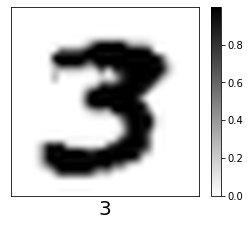

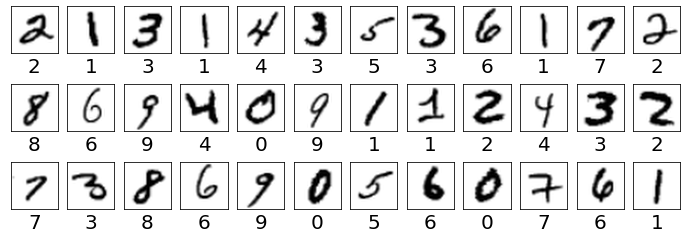

In [ ]:
plot_images(x3_train, y3_train, [27],  x_size=5,y_size=5, colorbar=True)
plot_images(x3_train, y3_train, range(5,41), columns=12)

##-**Entrainement du modele**
##*Model training*



In [ ]:
fit_verbosity=2
batch_size  = 512
epochs      =  20

history_Letnet = model_Letnet.fit(  x3_train, y3_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x3_test, y3_test))

Epoch 1/20
118/118 - 1s - loss: 0.6099 - accuracy: 0.8274 - val_loss: 0.1778 - val_accuracy: 0.9497 - 1s/epoch - 12ms/step
Epoch 2/20
118/118 - 1s - loss: 0.1422 - accuracy: 0.9572 - val_loss: 0.1079 - val_accuracy: 0.9670 - 652ms/epoch - 6ms/step
Epoch 3/20
118/118 - 1s - loss: 0.0940 - accuracy: 0.9714 - val_loss: 0.0700 - val_accuracy: 0.9782 - 723ms/epoch - 6ms/step
Epoch 4/20
118/118 - 1s - loss: 0.0759 - accuracy: 0.9768 - val_loss: 0.0661 - val_accuracy: 0.9793 - 714ms/epoch - 6ms/step
Epoch 5/20
118/118 - 1s - loss: 0.0645 - accuracy: 0.9807 - val_loss: 0.0480 - val_accuracy: 0.9855 - 720ms/epoch - 6ms/step
Epoch 6/20
118/118 - 1s - loss: 0.0553 - accuracy: 0.9831 - val_loss: 0.0464 - val_accuracy: 0.9849 - 718ms/epoch - 6ms/step
Epoch 7/20
118/118 - 1s - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0393 - val_accuracy: 0.9873 - 632ms/epoch - 5ms/step
Epoch 8/20
118/118 - 1s - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0406 - val_accuracy: 0.9871 - 654ms/epoch - 6ms/step
Ep

In [ ]:
score = model_Letnet.evaluate(x3_test, y3_test, verbose=2)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

313/313 - 1s - loss: 0.0338 - accuracy: 0.9893 - 648ms/epoch - 2ms/step
Test loss     : 0.0338
Test accuracy : 0.9893


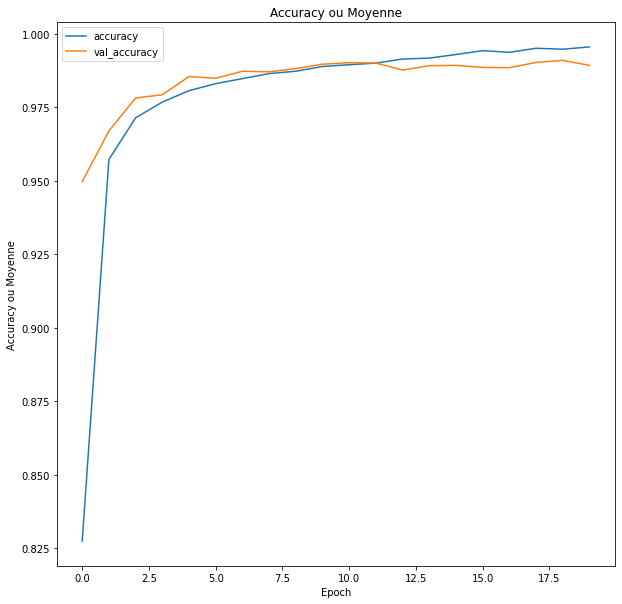

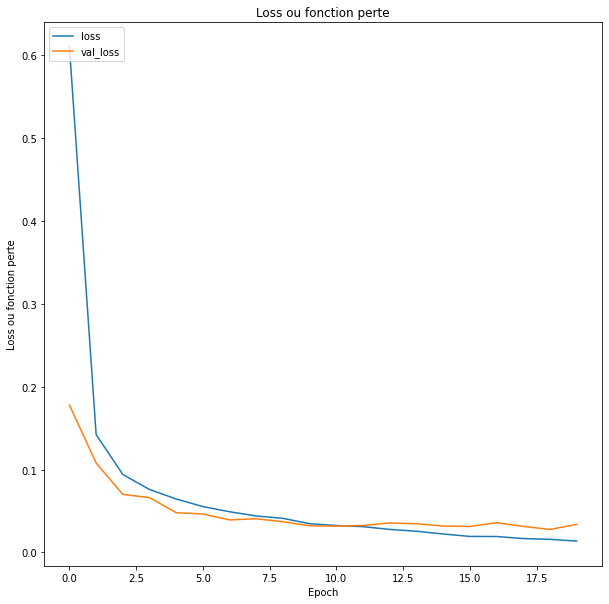

In [ ]:
plot={"Accuracy ou Moyenne":['accuracy','val_accuracy'], 'Loss ou fonction perte':['loss', 'val_loss']}
for title,curves in plot.items():
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.ylabel(title)
    plt.xlabel('Epoch')
    for c in curves:
        plt.plot(history_Letnet.history[c])
        plt.legend(curves, loc='upper left')
    plt.show()

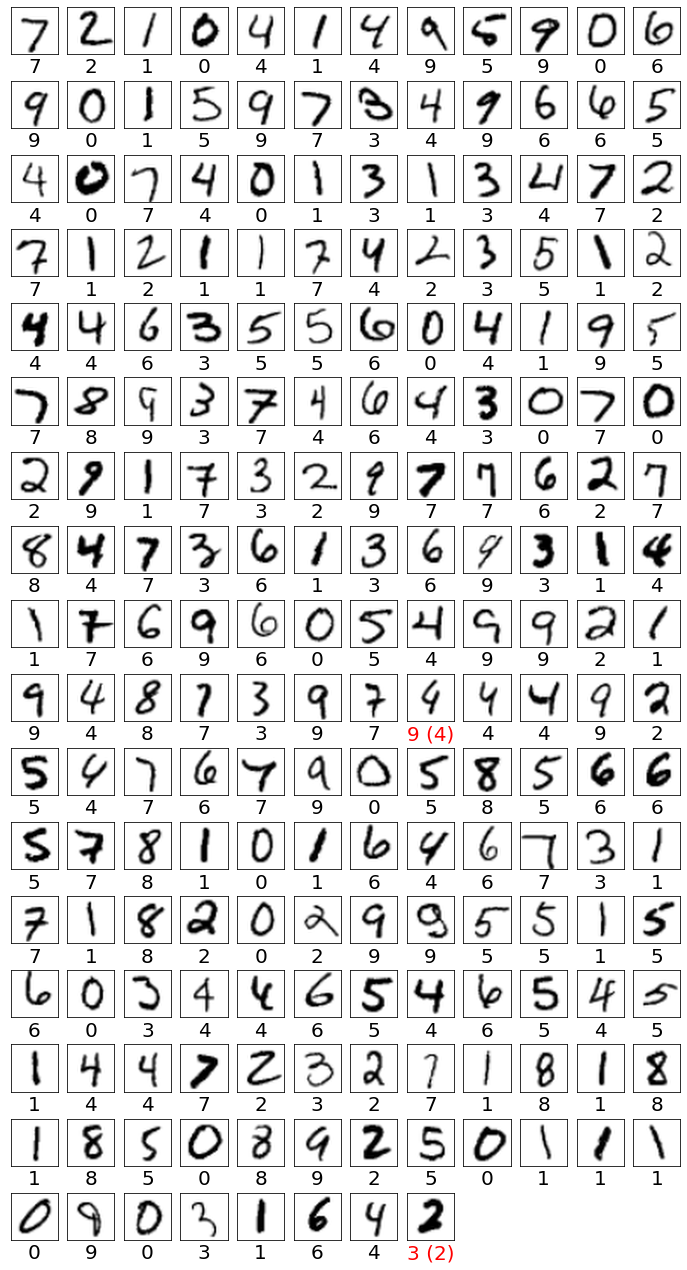

In [ ]:
y_sigmoid = model_Letnet.predict(x3_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)
plot_images(x3_test, y3_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred)

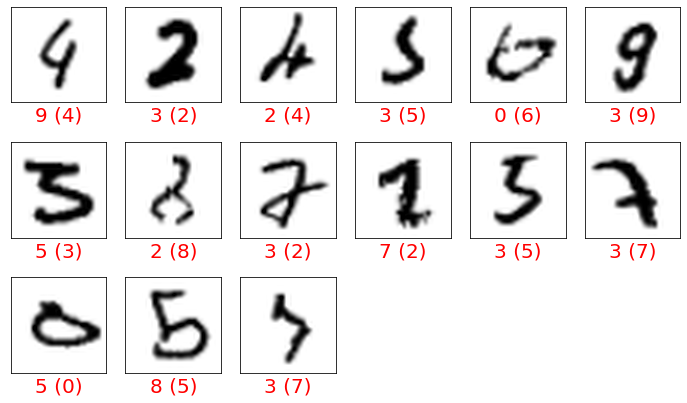

In [ ]:
errors=[ i for i in range(len(x3_test)) if y_pred[i]!=y3_test[i] ]
errors=errors[:min(24,len(errors))]
plot_images(x3_test, y3_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred)

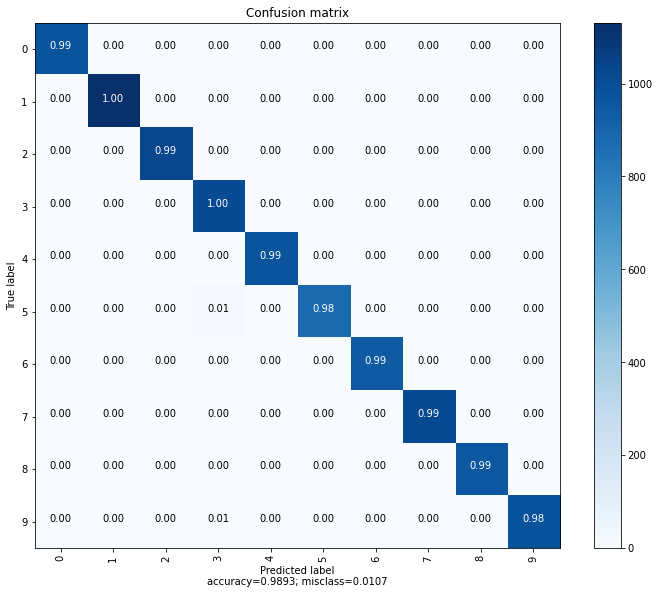

In [ ]:
plot_confusion_matrix(y3_test,y_pred,range(10),normalize=True)

#CONCLUSION 
##LE RESeau letnet est meilleur

In [ ]:

print(f'Test loss DNN     : {score_DNN[0]:4.4f}')
print(f'Test loss CNN     : {score_CNN[0]:4.4f}')
print(f'Test loss   Letnet  : {score[0]:4.4f}')

print(f'Test accuracy DNN : {score_DNN[1]:4.4f}')
print(f'Test accuracy CNN: {score_CNN[1]:4.4f}')
print(f'Test accuracy Letnet : {score[1]:4.4f}')

Test loss DNN     : 0.0771
Test loss CNN     : 0.0413
Test loss   Letnet  : 0.0338
Test accuracy DNN : 0.9764
Test accuracy CNN: 0.9862
Test accuracy Letnet : 0.9893
